# Example Jupyter notebook 

This Jupyter/IPython notebook demonstrates the use of a number of PmagPy functions within a notebook environment. The benefits of working within these notebooks include but are not limited to scientific reproducibility; coherent code development; convenient workspace for projects; and version control (when integrated with GitHub or other version control software).

### Table of Contents
* [The Dipole Equation](#The-dipole-equation)
* [Calculating the Angle Between Two Directions](#Angle-between-directions)
* [Fisher-Distributed Directions](#Generate-and-plot-Fisher-distributed-unit-vectors-from-a-specified-distribution)
* [Flip Directional Data](#Flip-polarity-of-directional-data)
* [Plotting and Analyzing Anisotropy Data](#Working-with-anisotropy-data)
* [Working with Apparent Polar Wander Paths](#Working-with-apparent-polar-wander-paths)
* [chi_magic() -- Example Susceptibility Data Analysis](#chi_magic.py)

**Note: This notebook makes heavy use of pandas for reading, displaying, and using data. More information about the pandas module and its use within PmagPy can be found [here](http://earthref.org/PmagPy/cookbook/#x1-1850007.4) within the documentation of the [PmagPy cookbook](http://earthref.org/PmagPy/cookbook/).**

In [18]:
import sys, os
#change to match where the PmagPy folder is on your computer
#sys.path.insert(0, '/Users/Laurentia/PmagPy')
#sys.path.insert(0, '/Users/lukefairchild765/GitHub_files/PmagPy/')
# USING FAIRCHILD FORK OF PMAGPY -- CONTINUAL PULL REQUESTS ARE MADE TO PMAGPY MASTER BUT MAY NOT BE UPDATED YET
sys.path.insert(0, '/Users/lukefairchild765/GitHub_files/fairchild_PmagPy/')
import pmag, pmagplotlib, ipmag, ipmagplotlib
from mpl_toolkits.basemap import Basemap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## The dipole equation

In [2]:
inclination = range(0,90,1)
latitude = []
for inc in inclination:
    lat = ipmag.lat_from_inc(inc)
    latitude.append(lat)

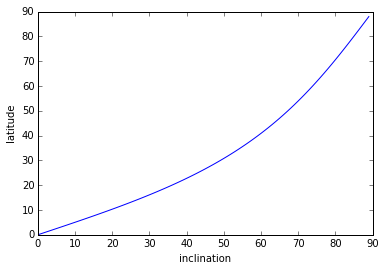

In [3]:
plt.plot(inclination,latitude)
plt.ylabel('latitude')
plt.xlabel('inclination')
plt.show()

## Angle between directions

In [4]:
direction1 = [150,-40]
direction2 = [120,60]

pmag.angle(direction1,direction2)

array([ 103.00072744])

## Generate and plot Fisher distributed unit vectors from a specified distribution

In [5]:
fisher_directions = ipmag.fishrot(k=40, n=50, Dec=200, Inc=30)
directions = pd.DataFrame(fisher_directions,columns=['dec','inc','length'])
directions.head()

,dec,inc,length
0,184.757678,20.766854,1
1,211.712482,53.597301,1
2,199.668916,32.035172,1
3,220.714252,19.678678,1
4,194.589079,17.893746,1


In [6]:
mean = ipmag.fisher_mean(directions.dec,directions.inc)
ipmag.print_direction_mean(mean)

Dec: 198.8  Inc: 29.0
Number of directions in mean (n): 50
Angular radius of 95% confidence (a_95): 3.6
Precision parameter (k) estimate: 33.1


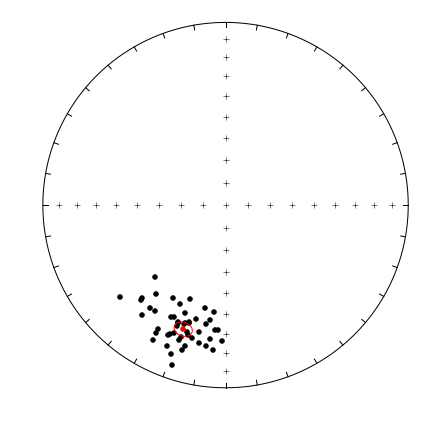

In [7]:
declinations, inclinations = ipmag.fishrot(k=40, n=50, Dec=200, Inc=30, DIBlock=False)

plt.figure(num=1,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(declinations,inclinations)
ipmag.plot_di_mean(mean['dec'],mean['inc'],mean['alpha95'],color='r')

## Flip polarity of directional data

Let's resolve the antipodes of the Fisher-distributed directions we just created using the function flip() function.

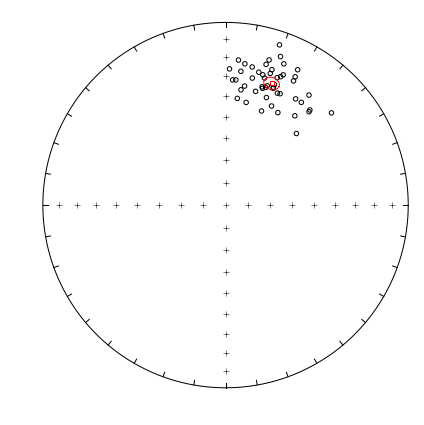

In [8]:
# get reversed directions
reverse = ipmag.flip(ipmag.make_di_block(declinations,inclinations))
rev_directions = pd.DataFrame(reverse,columns=['dec','inc','length'])

# take the Fisher mean of these reversed directions
rev_mean = ipmag.fisher_mean(rev_directions.dec,rev_directions.inc)

# plot the directions in opposite polarity
plt.figure(num=1,figsize=(6,6))
ipmag.plot_net(1)
ipmag.plot_di(rev_directions.dec, rev_directions.inc)
ipmag.plot_di_mean(rev_mean['dec'],rev_mean['inc'],rev_mean['alpha95'],color='r',marker='s')

## Working with anisotropy data

In [9]:
aniso_data = pd.read_csv('./PmagPy_Datafiles/ani_depthplot/rmag_anisotropy.txt',delimiter='\t',skiprows=1)
aniso_data.head()

,anisotropy_n,anisotropy_s1,anisotropy_s2,anisotropy_s3,anisotropy_s4,anisotropy_s5,anisotropy_s6,anisotropy_sigma,anisotropy_tilt_correction,anisotropy_type,anisotropy_unit,er_analyst_mail_names,er_citation_names,er_location_name,er_sample_name,er_site_name,er_specimen_name,magic_method_codes
0,192,0.332294,0.332862,0.334844,-0.000048,0.000027,-0.000263,0.000122,-1,AMS,Normalized by trace,NaN,This study,U1361A,318-U1361A-001H-2-W-35,318-U1361A-001H-2-W-35,318-U1361A-001H-2-W-35,LP-X:AE-H:LP-AN-MS:SO-V
1,192,0.333086,0.332999,0.333916,-0.000262,-0.000322,0.000440,0.000259,-1,AMS,Normalized by trace,NaN,This study,U1361A,318-U1361A-001H-3-W-90,318-U1361A-001H-3-W-90,318-U1361A-001H-3-W-90,LP-X:AE-H:LP-AN-MS:SO-V
2,192,0.333750,0.332208,0.334041,-0.000699,0.000663,0.002888,0.000093,-1,AMS,Normalized by trace,NaN,This study,U1361A,318-U1361A-001H-4-W-50,318-U1361A-001H-4-W-50,318-U1361A-001H-4-W-50,LP-X:AE-H:LP-AN-MS:SO-V
3,192,0.330565,0.333928,0.335507,0.000603,0.000212,-0.000932,0.000198,-1,AMS,Normalized by trace,NaN,This study,U1361A,318-U1361A-001H-5-W-59,318-U1361A-001H-5-W-59,318-U1361A-001H-5-W-59,LP-X:AE-H:LP-AN-MS:SO-V
4,192,0.332747,0.332939,0.334314,-0.001516,-0.000311,-0.000099,0.000162,-1,AMS,Normalized by trace,NaN,This study,U1361A,318-U1361A-001H-6-W-60,318-U1361A-001H-6-W-60,318-U1361A-001H-6-W-60,LP-X:AE-H:LP-AN-MS:SO-V


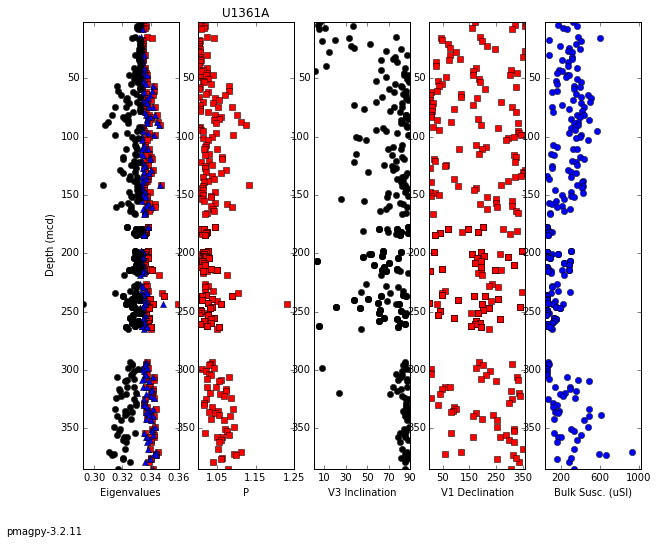

In [10]:
ipmag.aniso_depthplot(dir_path='./PmagPy_Datafiles/ani_depthplot/');

## Working with apparent polar wander paths

PmagPy features an apparent polar wander path (APWP) database for individual plates that goes back to 200 million years. A variety of plotting functions within PmagPy, together with the Basemap package of matplotlib, provide a great way to work with these paleomagnetic poles.

In [11]:
#THE FOLLOWING SHOULD PROBABLY BE INTEGRATED INTO THE GET_PLATE_DATA FUNCTION SO THAT OUTPUT IS EASIER TO WORK WITH

NA_poles_readin = pmag.get_plate_data('NA')
# take care of some formatting -- pole list is output as a string
NA_poles = NA_poles_readin.split('\n')[1:-1]
#create empty Data Frame
NA_poles_list = pd.DataFrame(columns=['age','Plat','Plong'])

NA_poles_new = []
for pole in NA_poles:
    pole_values = pole.split()
    # 
    NA_poles_list.ix[pole_values[0]]=pd.Series({'age':pole_values[0],
                                                  'Plat':pole_values[1],
                                                  'Plong':pole_values[2]}).apply(float)
    NA_poles_new.append(pole_values)
NA_poles_list.reset_index(inplace=True)
NA_poles_list.head()

,index,age,Plat,Plong
0,0.0,0,90.00,0.00
1,1.0,1,88.33,180.70
2,2.0,2,86.67,180.70
3,3.0,3,86.14,175.33
4,4.0,4,85.95,173.39


In [12]:
NA_poles_list = NA_poles_list.iloc[::-1]

In [13]:
NA_poles_list.head()

,index,age,Plat,Plong
198,198.0,198,67.64,91.56
197,197.0,197,69.01,92.87
196,196.0,196,70.36,94.36
195,195.0,195,71.70,96.06
194,194.0,194,72.54,96.64


In [14]:
type(NA_poles_list['Plong'][90])

numpy.float64

TypeError: can't multiply sequence by non-int of type 'float'

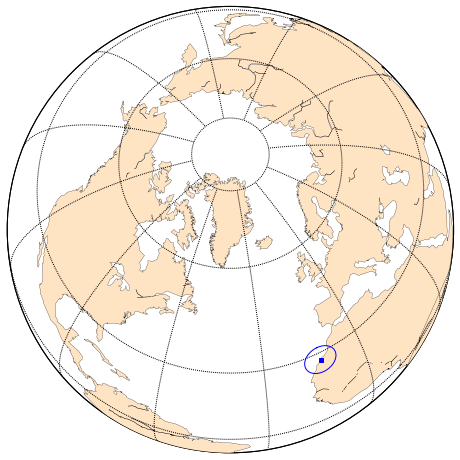

In [19]:
plt.figure(figsize=(8, 8))
pmap = Basemap(projection='ortho',lat_0=70,lon_0=320,
               resolution='c',area_thresh=50000)
pmap.drawcoastlines(linewidth=0.25)
pmap.fillcontinents(color='bisque',lake_color='white',zorder=1)
pmap.drawmapboundary(fill_color='white')
pmap.drawmeridians(np.arange(0,360,30))
pmap.drawparallels(np.arange(-90,90,30))


#Halls data:
ipmag.plot_pole(pmap,347.1,27.5,4.4,label='Halls (1979)',
               marker='s',color='Blue')

for n in xrange (0, 8):
     m = ipmag.plot_pole(pmap, NA_poles_list['Plong'][n],
                                  NA_poles_list['Plat'][n],
                                  NA_poles_list['index'][n])

#pmap.colorbar(m,location='bottom',pad="5%",label='Age of magnetization (Ma)')
plt.legend()
plt.savefig('Code_output/site_VGP_with_Laurentia_Pole_Compilation_colorbar.pdf')
plt.show()

180.7


TypeError: Not implemented for this type

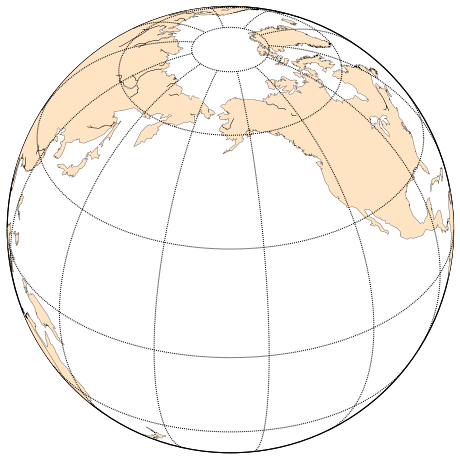

In [20]:
# DO NOT UNDERSTAND WHY THIS IS NOT WORKING

from mpl_toolkits.basemap import Basemap

m = Basemap(projection='ortho',lat_0=35,lon_0=200,resolution='c',area_thresh=50000)
plt.figure(figsize=(8, 8))
m.drawcoastlines(linewidth=0.25)
m.fillcontinents(color='bisque',lake_color='white',zorder=1)
m.drawmapboundary(fill_color='white')
m.drawmeridians(np.arange(0,360,30))
m.drawparallels(np.arange(-90,90,30))

age = 0
for n in range(2,len(NA_poles_list)):
    print NA_poles_list.Plong[n]
    if NA_poles_list.Plong[n] == 0.0:
        pmap = ipmag.plot_pole_colorbar(m, 0, int(NA_poles_list['Plat'][n]), 5,-0,-200,0)
    else:
        pmap = ipmag.plot_pole_colorbar(m, int(NA_poles_list['Plong'][n]), int(NA_poles_list['Plat'][n]),5,-NA_poles_list.age[n],-200,0)



m.colorbar(pmap,location='bottom',pad="5%",label='Age of magnetization (Ma)')
plt.legend()
#plt.savefig('Code_output/site_VGP_with_Laurentia_Pole_Compilation_colorbar.pdf')
plt.show()

## chi_magic.py

In [21]:
def chi_magic(path_to_file = '.',file_name = 'magic_measurements.txt'):
    """
    NAME
        chi_magic.py

    DESCRIPTION
        plots magnetic susceptibility as a function of frequency and temperature and AC field

    SYNTAX
        chi_magic.py [command line options]

    OPTIONS
        -h prints help message and quits
        -i allows interactive setting of FILE and temperature step
        -f FILE, specify magic_measurements format file
        -T IND, specify temperature step to plot
        -e EXP, specify experiment name to plot

    DEFAULTS
         FILE: magic_measurements.txt
         IND: first 
         SPEC: step through one by one
    """
    cont,FTinit,BTinit,k="",0,0,0
    complete_path = os.path.join(path_to_file,file_name)
    #sys.path.insert(0,path_to_insert)
#     meas_file = file_name
#     spec=""
#     Tind,cont=0,""
    EXP=""
#     fmt='svg' # default image type for saving
#     if '-h' in sys.argv:
#         print main.__doc__
#         sys.exit()
#     if '-i' in sys.argv:
#         file=raw_input("Input magic_measurements file name? [magic_measurements.txt]  ")
#         if file!="":meas_file=file
#     if '-e' in sys.argv:
#         ind=sys.argv.index('-e')
#         EXP=sys.argv[ind+1]
#     if '-f' in sys.argv:
#         ind=sys.argv.index('-f')
#         meas_file=sys.argv[ind+1]
#     if '-T' in sys.argv:
#         ind=sys.argv.index('-T')
#         Tind=int(sys.argv[ind+1])
    #
    meas_data,file_type=pmag.magic_read(complete_path)
    #
    # get list of unique experiment names
    #
    # initialize some variables (a continuation flag, plot initialization flags and the experiment counter
    experiment_names=[]
    for rec in meas_data:
        if rec['magic_experiment_name'] not in experiment_names:experiment_names.append(rec['magic_experiment_name'])
    #
    # hunt through by experiment name
    if EXP!="":
        try:
            k=experiment_names.index(EXP)
        except:
            print "Bad experiment name"
            sys.exit()
    while k < len(experiment_names):
        e=experiment_names[k]
        if EXP=="":print e, k+1 , 'out of ',len(experiment_names)
    #
    #  initialize lists of data, susceptibility, temperature, frequency and field
        X,T,F,B=[],[],[],[]
        for rec in meas_data:
            methcodes=rec['magic_method_codes']
            meths=methcodes.strip().split(':')
            if rec['magic_experiment_name']==e and "LP-X" in meths: # looking for chi measurement
                if 'measurement_temp' not in rec.keys():rec['measurement_temp']='300' # set defaults
                if 'measurement_freq' not in rec.keys():rec['measurement_freq']='0' # set defaults
                if 'measurement_lab_field_ac' not in rec.keys():rec['measurement_lab_field_ac']='0' # set default
                X.append(float(rec['measurement_x']))
                T.append(float(rec['measurement_temp']))
                F.append(float(rec['measurement_freq']))
                B.append(float(rec['measurement_lab_field_ac']))
    #
    # get unique list of Ts,Fs, and Bs
    #
        Ts,Fs,Bs=[],[],[]
        for k in range(len(X)):   # hunt through all the measurements
            if T[k] not in Ts:Ts.append(T[k])  # append if not in list
            if F[k] not in Fs:Fs.append(F[k])
            if B[k] not in Bs:Bs.append(B[k])
        Ts.sort() # sort list of temperatures, frequencies and fields
        Fs.sort()
        Bs.sort()
        if '-x' in sys.argv:
            k=len(experiment_names)+1 # just plot the one
        else:
            k+=1  # increment experiment number
    #
    # plot chi versus T and F holding B constant
    #  
        plotnum=1  # initialize plot number to 1
        if len(X)>2:  # if there are any data to plot, continue
            b=Bs[-1]  # keeping field constant and at maximum
            XTF=[] # initialize list of chi versus Temp and freq
            for f in Fs:   # step through frequencies sequentially
                XT=[]  # initialize list of chi versus temp
                for kk in range(len(X)): # hunt through all the data
                    if F[kk]==f and B[kk]==b:  # select data with given freq and field
                        XT.append([X[kk],T[kk]]) # append to list
                XTF.append(XT) # append list to list of frequencies
            if len(XT)>1: # if there are any temperature dependent data
                plt.figure(num=plotnum,figsize=(5,5)) # initialize plot
                pmagplotlib.plotXTF(plotnum,XTF,Fs,e,b) # call the plotting function
                pmagplotlib.drawFIGS({'fig':plotnum})
                plotnum+=1 # increment plot number
            f=Fs[0] # set frequency to minimum
            XTB=[] # initialize list if chi versus Temp and field
            for b in Bs:  # step through field values
                XT=[] # initial chi versus temp list for this field
                for kk in range(len(X)): # hunt through all the data
                    if F[kk]==f and B[kk]==b: # select data with given freq and field  
                        XT.append([X[kk],T[kk]]) # append to list
                XTB.append(XT)
            if len(XT)>1: # if there are any temperature dependent data
                plt.figure(num=plotnum,figsize=(5,5)) # set up plot
                pmagplotlib.plotXTB(plotnum,XTB,Bs,e,f) # call the plotting function
                pmagplotlib.drawFIGS({'fig':plotnum})
                plotnum+=1 # increment plot number
            if '-i' in sys.argv: 
                for ind in range(len(Ts)):  # print list of temperatures available
                    print ind,int(Ts[ind]) 
                cont=raw_input("Enter index of desired temperature step, s[a]ve plots, [return] to quit ")
                if cont=='a':
                        files={}
                        PLTS={}
                        for p in range(1,plotnum):
                            key=str(p)
                            files[key]=e+'_'+key+'.'+fmt
                            PLTS[key]=key
                        pmagplotlib.saveP(PLTS,files)
                        cont=raw_input("Enter index of desired temperature step, s[a]ve plots, [return] to quit ")
                if cont=="":cont='q'
            while cont!="q":
                if '-i' in sys.argv:Tind=int(cont) # set temperature index
                b=Bs[-1] # set field to max available
                XF=[] # initial chi versus frequency list
                for kk in range(len(X)): # hunt through the data
                    if T[kk]==Ts[Tind] and B[kk]==b:  # if temperature and field match,
                        XF.append([X[kk],F[kk]]) # append the data
                if len(XF)>1: # if there are any data to plot
                    if FTinit==0: # if not already initialized, initialize plot
                        plt.figure(num=plotnum,figsize=(5,5))
                        FTinit=1 
                        XFplot=plotnum
                        plotnum+=1 # increment plotnum
                    pmagplotlib.plotXFT(XFplot,XF,Ts[Tind],e,b)
                    pmagplotlib.drawFIGS({'fig':plotnum})
                else:
                    print '\n *** Skipping susceptibitily-frequency plot as a function of temperature *** \n'
                f=Fs[0] # set frequency to minimum available
                XB=[] # initialize chi versus field list
                for kk in range(len(X)): # hunt through the data
                    if T[kk]==Ts[Tind] and F[kk]==f:  # if temperature and field match those desired
                        XB.append([X[kk],B[kk]]) # append the data to list
                if len(XB)>1: # if there are any data
                    if BTinit==0: # if plot not already initialized
                        plt.figure(num=plotnum,figsize=(5,5)) # do it
                        BTinit=1 
                    pmagplotlib.plotXBT(plotnum,XB,Ts[Tind],e,f) # and call plotting function 
                    pmagplotlib.drawFIGS({'fig':plotnum})
                else:
                    print 'Skipping susceptibitily - AC field plot as a function of temperature'
                if '-i' in sys.argv:
                    for ind in range(len(Ts)): # just in case you forgot, print out a new list of temperatures
                        print ind,int(Ts[ind]) 
                    cont=raw_input("Enter index of next temperature step, s[a]ve plots,  [return] to quit ") # ask for new temp
                    if cont=="":sys.exit()
                    if cont=='a':
                        files={}
                        PLTS={}
                        for p in range(1,plotnum):
                            key=str(p)
                            files[key]=e+'_'+key+'.'+fmt
                            PLTS[key]=p
                        pmagplotlib.saveP(PLTS,files)
                        cont=raw_input("Enter index of desired temperature step, s[a]ve plots, [return] to quit ")
                        if cont=="":sys.exit()
                else:
                    ans=raw_input("enter s[a]ve to save files,  [return] to quit ")
                    if ans=='a': 
                        files={}
                        PLTS={}
                        for p in range(1,plotnum):
                            key=str(p)
                            files[key]=e+'_'+key+'.'+fmt
                            PLTS[key]=p
                        pmagplotlib.saveP(PLTS,files)
                        sys.exit()
                    else:
                        sys.exit()

IRM-Kappa-2352 1 out of  2
IRM-OldBlue-1892 2 out of  2


/Users/lukefairchild765/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/cbook.py:137: MatplotlibDeprecationWarning: The "loc" positional argument to legend is deprecated. Please use the "loc" keyword instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


UnboundLocalError: local variable 'Tind' referenced before assignment

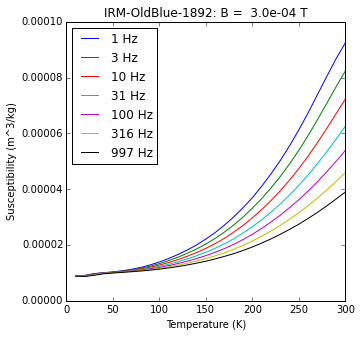

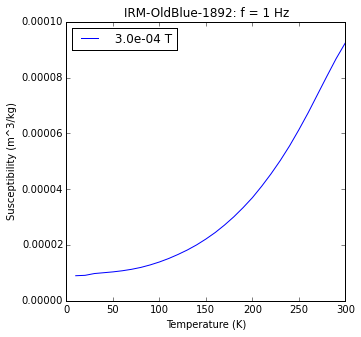

In [22]:
chi_magic(path_to_file='./PmagPy_Datafiles/chi_magic/',file_name='chi_magic_example.dat')

## curie.py

## zeq.py

In [23]:
def zeq():
    """
    NAME
       zeq.py
  
    DESCRIPTION
       plots demagnetization data. The equal area projection has the X direction (usually North in geographic coordinates)
          to the top.  The red line is the X axis of the Zijderveld diagram.  Solid symbols are lower hemisphere. 
          The solid (open) symbols in the Zijderveld diagram are X,Y (X,Z) pairs.  The demagnetization diagram plots the
          fractional remanence remaining after each step. The green line is the fraction of the total remaence removed 
          between each step.        

    INPUT FORMAT
       takes specimen_name treatment intensity declination inclination  in space
 delimited file

    SYNTAX
        zeq.py [command line options

    OPTIONS
        -f FILE for reading from command line
        -u [mT,C] specify units of mT OR C, default is unscaled
    """
    if '-h' in sys.argv: # check if help is needed
        print main.__doc__
        sys.exit() # graceful quit
    else:
        if '-f' in sys.argv:
            ind=sys.argv.index('-f')
            file=sys.argv[ind+1]
        else:
            print main.__doc__
            sys.exit()
        if '-u' in sys.argv:
            ind=sys.argv.index('-u')
            units=sys.argv[ind+1]
            if units=="C":SIunits="K"
            if units=="mT":SIunits="T"
        else:
            units="U"
            SIunits="U"
    f=open(file,'rU')
    data=f.readlines()
#
    datablock= [] # set up list for data
    fmt='svg' # default image format
    s="" # initialize specimen name
    angle=0.
    for line in data:   # read in the data from standard input
        rec=line.split() # split each line on space to get records
        if angle=="":angle=float(rec[3])
        if s=="":s=rec[0]
        if units=='mT':datablock.append([float(rec[1])*1e-3,float(rec[3]),float(rec[4]),1e-3*float(rec[2]),'','g']) # treatment, dec, inc, int # convert to T and Am^2 (assume emu)
        if units=='C':datablock.append([float(rec[1])+273.,float(rec[3]),float(rec[4]),1e-3*float(rec[2]),'','g']) # treatment, dec, inc, int, convert to K and Am^2, assume emu
        if units=='U':datablock.append([float(rec[1]),float(rec[3]),float(rec[4]),float(rec[2]),'','g']) # treatment, dec, inc, int, using unscaled units 
# define figure numbers in a dictionary for equal area, zijderveld,  
#  and intensity vs. demagnetiztion step respectively
    ZED={}
    ZED['eqarea'],ZED['zijd'],  ZED['demag']=1,2,3 
    pmagplotlib.plot_init(ZED['eqarea'],5,5) # initialize plots
    pmagplotlib.plot_init(ZED['zijd'],5,5)
    pmagplotlib.plot_init(ZED['demag'],5,5)
#
#
    pmagplotlib.plotZED(ZED,datablock,angle,s,SIunits) # plot the data
    pmagplotlib.drawFIGS(ZED)
    while 1:

#
# print out data for this sample to screen
#
        recnum=0
        for plotrec in datablock:
            if units=='mT':print '%i  %7.1f %8.3e %7.1f %7.1f ' % (recnum,plotrec[0]*1e3,plotrec[3],plotrec[1],plotrec[2])
            if units=='C':print '%i  %7.1f %8.3e %7.1f %7.1f ' % (recnum,plotrec[0]-273.,plotrec[3],plotrec[1],plotrec[2])
            if units=='U':print '%i  %7.1f %8.3e %7.1f %7.1f ' % (recnum,plotrec[0],plotrec[3],plotrec[1],plotrec[2])
            recnum += 1
        end_pca=len(datablock)-1 # initialize end_pca, beg_pca to first and last measurement
        beg_pca=0
        ans=raw_input(" s[a]ve plot, [b]ounds for pca and calculate, change [h]orizontal projection angle, [q]uit:   ")
        if ans =='q':
            sys.exit() 
        if  ans=='a':
            files={}
            for key in ZED.keys():
                files[key]=s+'_'+key+'.'+fmt 
            pmagplotlib.saveP(ZED,files)
        if ans=='h':
            angle=float(raw_input(" Declination to project onto horizontal axis? "))
            pmagplotlib.plotZED(ZED,datablock,angle,s,SIunits) # plot the data
        if ans=='b':
            GoOn=0
            while GoOn==0: # keep going until reasonable bounds are set
                print 'Enter index of first point for pca: ','[',beg_pca,']'
                answer=raw_input('return to keep default  ')
                if answer != "":beg_pca=int(answer)
                print 'Enter index  of last point for pca: ','[',end_pca,']'
                answer=raw_input('return to keep default  ')
                if answer != "":
                    end_pca=int(answer) 
                if beg_pca >=0 and beg_pca<=len(datablock)-2 and end_pca>0 and end_pca<len(datablock): 
                    GoOn=1
                else:
                    print "Bad entry of indices - try again"
                    end_pca=len(datablock)-1
                    beg_pca=0
            GoOn=0
            while GoOn==0:
                ct=raw_input('Enter Calculation Type: best-fit line,  plane or fisher mean [l]/p/f :  ' )
                if ct=="" or ct=="l": 
                    calculation_type="DE-BFL"
                    GoOn=1 # all good
                elif ct=='p':
                    calculation_type="DE-BFP"
                    GoOn=1 # all good
                elif ct=='f':
                    calculation_type="DE-FM"
                    GoOn=1 # all good
                else: 
                    print "bad entry of calculation type: try again. " # keep going
            pmagplotlib.plotZED(ZED,datablock,angle,s,SIunits) # plot the data
            mpars=pmag.domean(datablock,beg_pca,end_pca,calculation_type) # get best-fit direction/great circle
            pmagplotlib.plotDir(ZED,mpars,datablock,angle) # plot the best-fit direction/great circle
            print 'Specimen, calc_type, N, min, max, MAD, dec, inc'
            if units=='mT':print '%s %s %i  %6.2f %6.2f %6.1f %7.1f %7.1f' % (s,calculation_type,mpars["specimen_n"],mpars["measurement_step_min"]*1e3,mpars["measurement_step_max"]*1e3,mpars["specimen_mad"],mpars["specimen_dec"],mpars["specimen_inc"])
            if units=='C':print '%s %s %i  %6.2f %6.2f %6.1f %7.1f %7.1f' % (s,calculation_type,mpars["specimen_n"],mpars["measurement_step_min"]-273,mpars["measurement_step_max"]-273,mpars["specimen_mad"],mpars["specimen_dec"],mpars["specimen_inc"])
            if units=='U':print '%s %s %i  %6.2f %6.2f %6.1f %7.1f %7.1f' % (s,calculation_type,mpars["specimen_n"],mpars["measurement_step_min"],mpars["measurement_step_max"],mpars["specimen_mad"],mpars["specimen_dec"],mpars["specimen_inc"])


In [24]:
zeq?

## Hysteresis Data

In [43]:
def dayplot(path_to_file = '.',hyst_file="rmag_hysteresis.txt",rem_file="rmag_remanence.txt"):
    """
    NAME
        dayplot_magic.py

    DESCRIPTION
        makes 'day plots' (Day et al. 1977) and squareness/coercivity, 
        plots 'linear mixing' curve from Dunlop and Carter-Stiglitz (2006).
          squareness coercivity of remanence (Neel, 1955) plots after
          Tauxe et al. (2002)

    SYNTAX
        dayplot_magic.py [command line options]

    OPTIONS
        -h prints help message and quits
        -f: specify input hysteresis file, default is rmag_hysteresis.txt
        -fr: specify input remanence file, default is rmag_remanence.txt
        -fmt [svg,png,jpg] format for output plots
        -sav saves plots and quits quietly
    """
    args=sys.argv
    hyst_path = os.path.join(path_to_file,hyst_file)
    rem_path = os.path.join(path_to_file,rem_file)
    #hyst_file,rem_file="rmag_hysteresis.txt","rmag_remanence.txt"
    dir_path = path_to_file
    verbose=pmagplotlib.verbose
    fmt='svg' # default file format
#     if '-WD' in args:
#        ind=args.index('-WD')
#        dir_path=args[ind+1]
#     if "-h" in args:
#         print main.__doc__
#         sys.exit()
#     if '-f' in args:
#         ind=args.index("-f")
#         hyst_file=args[ind+1]
#     if '-fr' in args:
#         ind=args.index("-fr")
#         rem_file=args[ind+1]
#     if '-fmt' in sys.argv:
#         ind=sys.argv.index("-fmt")
#         fmt=sys.argv[ind+1]
#     if '-sav' in sys.argv:
#         plots=1
#         verbose=0
#     else: plots=0
#     hyst_file=dir_path+'/'+hyst_file
#     rem_file=dir_path+'/'+rem_file
    #
    # initialize some variables
    # define figure numbers for Day,S-Bc,S-Bcr
    DSC={}
    DSC['day'],DSC['S-Bc'],DSC['S-Bcr'],DSC['bcr1-bcr2']=1,2,3,4
    plt.figure(num=DSC['day'],figsize=(5,5))
    plt.figure(num=DSC['S-Bc'],figsize=(5,5))
    plt.figure(num=DSC['S-Bcr'],figsize=(5,5))
    plt.figure(num=DSC['bcr1-bcr2'],figsize=(5,5))
#     pmagplotlib.plot_init(DSC['day'],5,5)
#     pmagplotlib.plot_init(DSC['S-Bc'],5,5)
#     pmagplotlib.plot_init(DSC['S-Bcr'],5,5)
#     pmagplotlib.plot_init(DSC['bcr1-bcr2'],5,5)
    #
    #
    hyst_data,file_type=pmag.magic_read(hyst_path)
    rem_data,file_type=pmag.magic_read(rem_path)
    #
    S,BcrBc,Bcr2,Bc,hsids,Bcr=[],[],[],[],[],[]
    Ms,Bcr1,Bcr1Bc,S1=[],[],[],[]
    locations=''
    for rec in  hyst_data:
        if 'er_location_name' in rec.keys() and rec['er_location_name'] not in locations: locations=locations+rec['er_location_name']+'_'
        if rec['hysteresis_bcr'] !="" and rec['hysteresis_mr_moment']!="": 
            S.append(float(rec['hysteresis_mr_moment'])/float(rec['hysteresis_ms_moment']))
            Bcr.append(float(rec['hysteresis_bcr']))
            Bc.append(float(rec['hysteresis_bc']))
            BcrBc.append(Bcr[-1]/Bc[-1]) 
            if 'er_synthetic_name' in rec.keys() and rec['er_synthetic_name']!="":
                rec['er_specimen_name']=rec['er_synthetic_name']
            hsids.append(rec['er_specimen_name'])
    if len(rem_data)>0:
        for rec in  rem_data:
            if rec['remanence_bcr'] !="" and float(rec['remanence_bcr'])>0:
                try:
                    ind=hsids.index(rec['er_specimen_name'])
                    Bcr1.append(float(rec['remanence_bcr']))
                    Bcr1Bc.append(Bcr1[-1]/Bc[ind])
                    S1.append(S[ind])
                    Bcr2.append(Bcr[ind])
                except ValueError:
                    if verbose:print 'hysteresis data for ',rec['er_specimen_name'],' not found'
    #
    # now plot the day and S-Bc, S-Bcr plots
    #
    leglist=[]
    if len(Bcr1)>0:
        pmagplotlib.plotDay(DSC['day'],Bcr1Bc,S1,'ro');
        pmagplotlib.plotSBcr(DSC['S-Bcr'],Bcr1,S1,'ro'); 
        pmagplotlib.plot_init(DSC['bcr1-bcr2'],5,5);
        pmagplotlib.plotBcr(DSC['bcr1-bcr2'],Bcr1,Bcr2);
    else:
        del DSC['bcr1-bcr2']
    pmagplotlib.plotDay(DSC['day'],BcrBc,S,'bs');
    pmagplotlib.plotSBcr(DSC['S-Bcr'],Bcr,S,'bs'); 
    pmagplotlib.plotSBc(DSC['S-Bc'],Bc,S,'bs');
    plt.show();
#     files={}
#     if len(locations)>0:locations=locations[:-1]
#     for key in DSC.keys():
#         files[key]='LO:_'+locations+'_'+'SI:__SA:__SP:__TY:_'+key+'_.'+fmt
#     if verbose:
#         pmagplotlib.drawFIGS(DSC)
#         ans=raw_input(" S[a]ve to save plots, return to quit:  ")
#         if ans=="a":
#             pmagplotlib.saveP(DSC,files)
#         else: sys.exit()
#     if plots:  pmagplotlib.saveP(DSC,files)

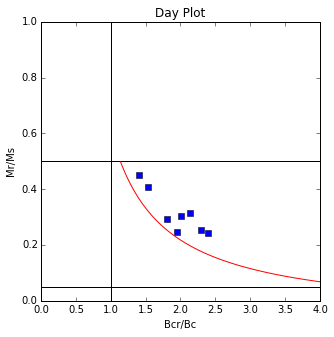

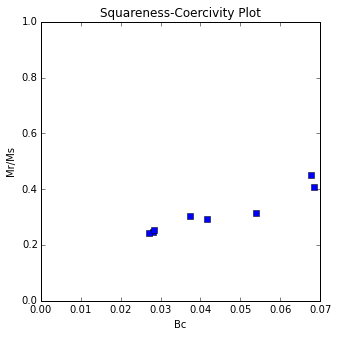

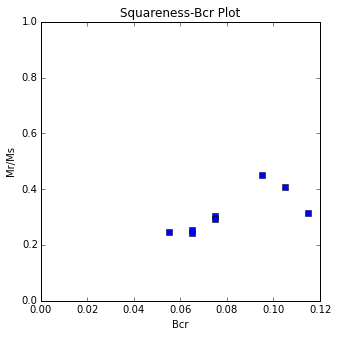

In [44]:
dayplot(path_to_file='./PmagPy_Datafiles/dayplot_magic/', hyst_file='dayplot_magic_example.dat')